In [1]:
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [3]:
with open("sarcasm_v2_processed.json",'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])


In [4]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [5]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [6]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [9]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 1s - loss: 0.6582 - accuracy: 0.6037 - val_loss: 0.5331 - val_accuracy: 0.8126 - 1s/epoch - 2ms/step
Epoch 2/30
625/625 - 1s - loss: 0.4070 - accuracy: 0.8375 - val_loss: 0.3646 - val_accuracy: 0.8445 - 885ms/epoch - 1ms/step
Epoch 3/30
625/625 - 1s - loss: 0.3046 - accuracy: 0.8758 - val_loss: 0.3358 - val_accuracy: 0.8559 - 715ms/epoch - 1ms/step
Epoch 4/30
625/625 - 1s - loss: 0.2551 - accuracy: 0.9003 - val_loss: 0.3392 - val_accuracy: 0.8522 - 760ms/epoch - 1ms/step
Epoch 5/30
625/625 - 1s - loss: 0.2211 - accuracy: 0.9155 - val_loss: 0.3450 - val_accuracy: 0.8520 - 744ms/epoch - 1ms/step
Epoch 6/30
625/625 - 1s - loss: 0.1929 - accuracy: 0.9286 - val_loss: 0.3396 - val_accuracy: 0.8554 - 740ms/epoch - 1ms/step
Epoch 7/30
625/625 - 1s - loss: 0.1715 - accuracy: 0.9368 - val_loss: 0.3648 - val_accuracy: 0.8438 - 691ms/epoch - 1ms/step
Epoch 8/30
625/625 - 1s - loss: 0.1534 - accuracy: 0.9453 - val_loss: 0.3706 - val_accuracy: 0.8499 - 791ms/epoch - 1ms/step
Epo

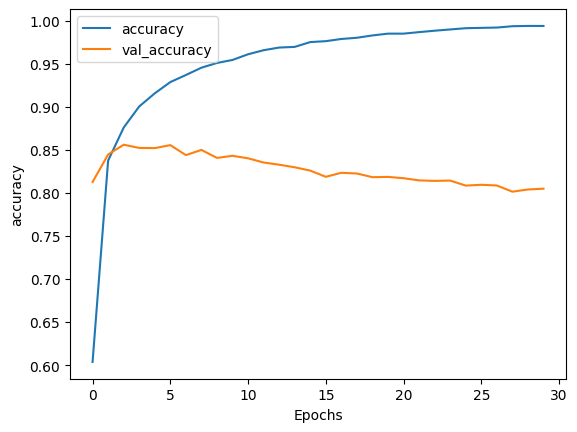

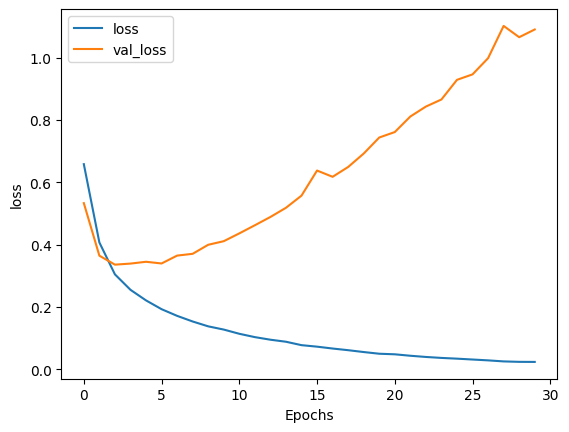

In [10]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [17]:
sentence = ["3 reasons to get out of your comfort zone immediately"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
hasil = model.predict(padded).tolist()

1/1 [==============================] - 0s 15ms/step


In [18]:
chance = hasil[0][0]
persenan = round(chance*100,2)
print(persenan,"%")

5.05 %


# PICKLE

In [13]:
import pickle

In [14]:
with open('sarcasm_pickle','wb') as r:
    pickle.dump(model,r)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\embedding
......vars
.........0
...layers\global_average_pooling1d
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-11-26 16:44:49         1978
metadata.json                                  2022-11-26 16:44:49           64
variables.h5                                   2022-11-26 16:44:49      1948548
